<a href="https://colab.research.google.com/github/shrutijain05/IDC409-Project/blob/main/IDC409_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IDC409 Project**

***Shruti Jain (MS20010)***

----------------------------------------------------------------------------------------------------------------    **OBJECT IDENTIFICATION** -------------------------------------------------------------------------

importing relevent libraries

In [ ]:
import numpy as np                                                                            #*numpy library to work with arrays and associated mathematical functions*
import cv2                                                                                    #*open cv library to access computer vision algorithms*
import gdown                                                                                  #*gdown library to access files stored on gdrive*
from google.colab.patches import cv2_imshow                                                   #*importing cv2_imshow function to display the final image*
from IPython.display import Image                                                             #*importing Image function to display initial image*

downloading image into notebook

*(further the image can also be accessed by the following link : https://drive.google.com/file/d/1x9V7PBSwajtpRfHRLbt6rXPKju7PtY_H/view?usp=drive_link)*

In [ ]:
gdown.download('https://drive.google.com/uc?id=1x9V7PBSwajtpRfHRLbt6rXPKju7PtY_H', 'img.jpeg', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1x9V7PBSwajtpRfHRLbt6rXPKju7PtY_H
To: /content/img.jpeg
100%|██████████| 54.2k/54.2k [00:00<00:00, 37.9MB/s]


'img.jpeg'

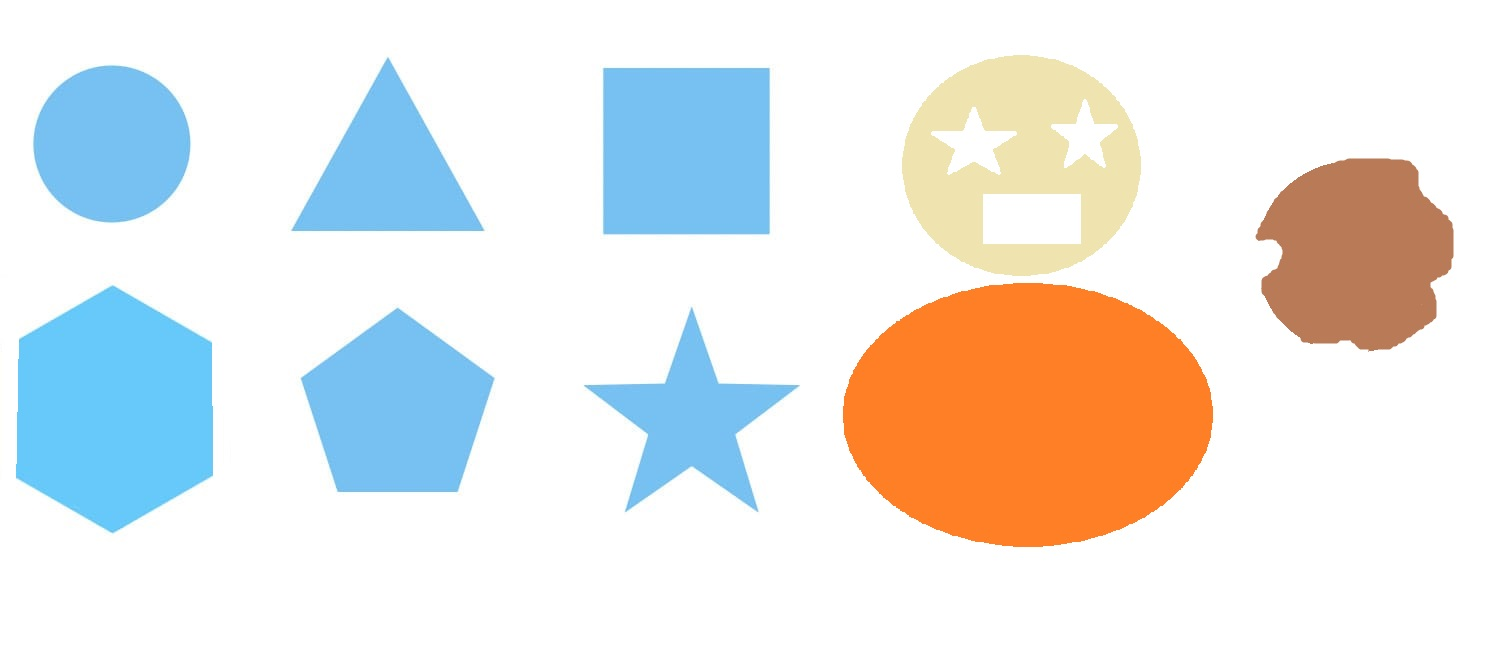

In [ ]:
Image('img.jpeg')                                                                             #*intial image*

image detection and conversion code

In [ ]:
img = cv2.imread('img.jpeg')                                                                  #*this code will input the image for detection*
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                               #*passing the image and the conversion we want, which will be a gray scale
                                                                                              #image (converting the input image to gray image)*
thrash_type, thrash = cv2.threshold(imgGrey, 240, 250, cv2.THRESH_BINARY)                     #*this code will generate thresshold image by passing the grey scale image, threshold
                                                                                              #number pixels that don't meet the threshold requirement, and cv2.THRESH_BINARY
                                                                                              #function  and will also give us the threshold type through this function every pixel
                                                                                              # depending on its darkness will be converted to black and white or (0 or 1)*

retriving outer edge coordinates and contour iteration code

In [ ]:
contours, hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)    #*detecting edges of the shape, here contour will store list of contours and
                                                                                        #hierarchy will store the relationship in between contours in the list*

#******************************* iteration code that will iterate through each contour to retrive coordinates of each provided shape ********************************************#

for contour in contours:

    epsilon = 0.01* cv2.arcLength(contour, True)                                        #*defining precission*
    approx = cv2.approxPolyDP(contour, epsilon, True)                                   #*aproximating the shape we want*

    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)                                    #*drawing contours with balck color and a thickness of 5 on screen*

    x = approx.ravel()[0]                                                               #*defining (x,y) coordinates of the contour where we want to put text (specifying the
    y = approx.ravel()[1] - 5                                                           #type of contour) on*


    txt_coord = (x,y)                                                                   #*variable defining the location of text on contour*
    txt_color = (0, 0, 0)                                                               #*variable defining text color (choosen balck)*
    txt_font = cv2.FONT_HERSHEY_COMPLEX                                                 #*varible defining the font of the text*

#_____________________________the below code will recognise the shapes depending on the amount of corners they have which will just be the length of approx______________________#

    if len(approx) == 3:

        cv2.putText(img, "Triangle", txt_coord, txt_font, 0.5, txt_color)               #*this function will put text on the specified coordinates reflecting that the
                                                                                        #particular contour is a traingle*
    elif len(approx) == 4 :

        x1 ,y1, w, h = cv2.boundingRect(approx)                                         #*finding width(w) and height(h) of the contour to calculate aspect ratio of the shape*
        aspectRatio = float(w)/h                                                        #*calculating aspect ratio of the shape to distinguish between square and rectangle*
        print("\n aspectRatio \n", aspectRatio)

        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
          cv2.putText(img, "square", txt_coord, txt_font, 0.5, txt_color)

        else:
          cv2.putText(img, "rectangle", txt_coord, txt_font, 0.5, txt_color)

    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", txt_coord, txt_font, 0.5, txt_color)

    elif len(approx) == 6:
        cv2.putText(img, "Hexagon", txt_coord, txt_font, 0.5, txt_color)

    elif len(approx) == 10:
        cv2.putText(img, "Star", txt_coord, txt_font, 0.5, txt_color)

    else:
        cv2.putText(img, "Circle", txt_coord, txt_font, 0.5, txt_color)


 aspectRatio 
 2.262368815592204

 aspectRatio 
 1.0

 aspectRatio 
 1.96


display code

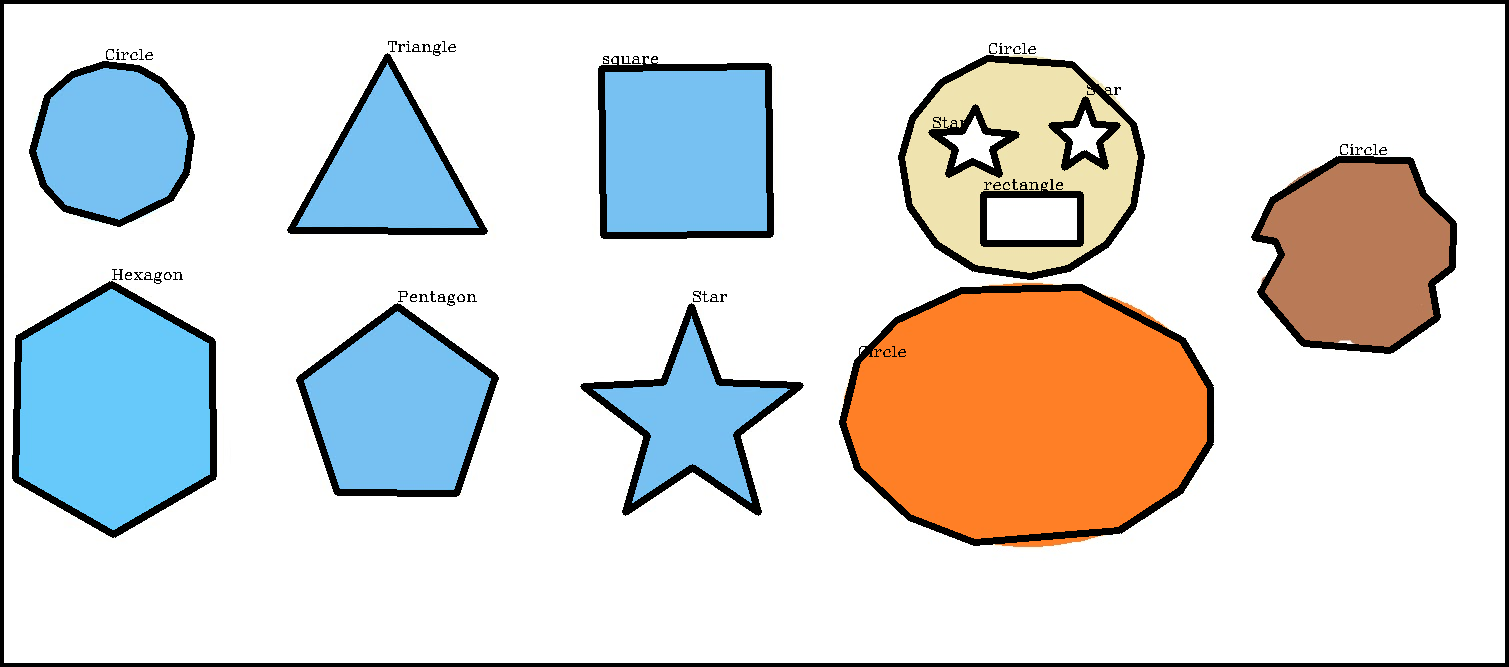

-1

In [ ]:
cv2_imshow(img)                                                                        #*displaying the input image with detected shapes*
cv2.waitKey(0)                                                                         #*stopping image window to close untill closed manually*